Problem 1

In [2]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Loading dataset (to simplify sorting, make one matrix with X[:, last]=y)

In [3]:
def load_dataset():       
    f = open("01_homework_dataset.csv")
    f.readline()  # skip the header
    dataset = np.loadtxt(f, delimiter=",")
    X = dataset[:,:4]
    return X
X = load_dataset()

Function, that count Gini index (only for our specific case, it will be more readable)

In [4]:
def gini_index(X):
    a = np.array([0,0,0])
    for i in X:        
        if i[3] == 0:
            a[0] += 1
        elif i[3] == 1:
            a[1] += 1
        else:
            a[2] += 1
    p = np.square(a/len(X))
    return (1-sum(p))

Function, that split one matrix to two, from the given line

In [5]:
def splitting_array(X,n):
    return X[:n,:], X[n:,:]

Function, that count delta Gini

In [6]:
def count_delta(l, x1, x2,i):
    k = 1-(i*gini_index(x1)+(l-i)*gini_index(x2))/l
    return k

Function, that saves all the delta Gini (by given dimension) to array, and finding position of split, to reach maximum index

In [7]:
def split_by_inp(X, inp):
    X = X[X[:, inp].argsort()]    
    g_i = np.zeros(len(X)-1)
    for i in range(1, len(X)):
        x1, x2 = splitting_array(X,i)
        g_i[i-1]=count_delta(len(X), x1, x2,i)  
    plt.plot(g_i)
    plt.show()
    max_arg = np.argmax(g_i)
    print ("Dimension: {0}\nSplit position: {1}\nDelta Gini: {2}\nXl: {3}\nXr: {4}".
           format(inp+1,max_arg+1,np.max(g_i),X[max_arg,inp],X[max_arg+1,inp]))
    pass

Finding the first position to split 

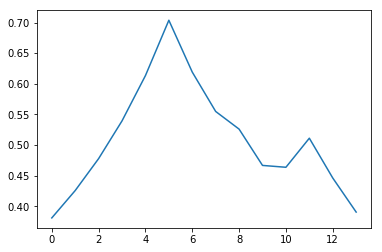

Dimension: 1
Split position: 6
Delta Gini: 0.7037037037037037
Xl: 4.1
Xr: 4.5


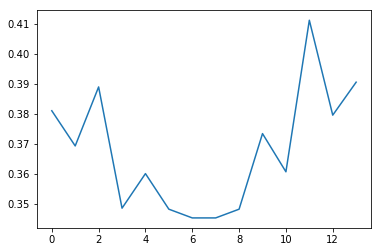

Dimension: 2
Split position: 12
Delta Gini: 0.4111111111111111
Xl: 0.3
Xr: 0.4


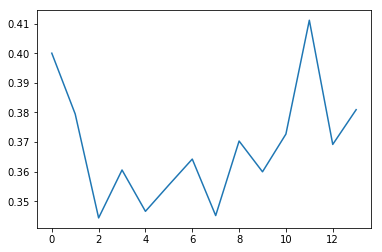

Dimension: 3
Split position: 12
Delta Gini: 0.4111111111111111
Xl: 4.4
Xr: 4.5


In [8]:
iG_0 = gini_index(X)
for i in range(3):
    split_by_inp(X, i)

As we can see by delta Gini index, the best split will be, if we split X1 between 4.1 and 4.5. Let's make the same thing with left part, and right part

In [9]:
X = X[X[:, 0].argsort()] 
X_L, X_R = splitting_array(X,6)
print (X_L)

[[ 0.4  0.1  4.3  1. ]
 [ 0.5  0.   2.3  1. ]
 [ 1.   0.1  2.8  1. ]
 [ 1.3 -0.2  1.8  1. ]
 [ 2.7 -0.5  4.2  1. ]
 [ 4.1  0.3  5.1  1. ]]


As we see, we have no need to improve left part of a tree further, so let's find the right part of tree

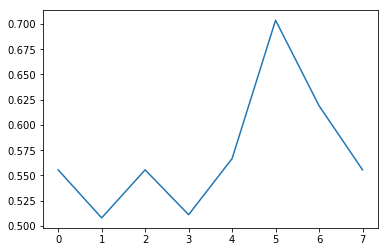

Dimension: 1
Split position: 6
Delta Gini: 0.7037037037037037
Xl: 6.9
Xr: 7.4


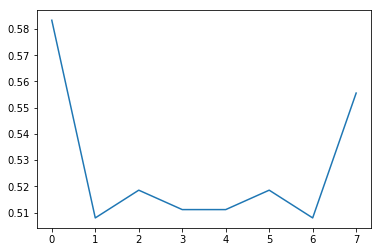

Dimension: 2
Split position: 1
Delta Gini: 0.5833333333333333
Xl: -0.3
Xr: -0.2


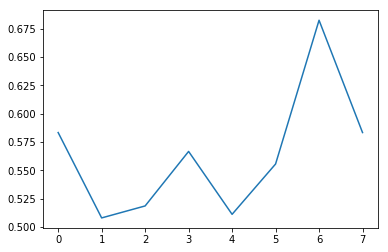

Dimension: 3
Split position: 7
Delta Gini: 0.6825396825396826
Xl: 4.4
Xr: 4.5


In [10]:
iG_1 = gini_index(X_R)

for i in range(3):
    split_by_inp(X_R, i)

As we can see by delta Gini index, the best split will be, if we split X1 again between 6.9 and 7.4. Let's see what we've got

In [11]:
X_R = X_R[X_R[:, 0].argsort()] 
X_R_L, X_R_R = splitting_array(X_R,6)
print (X_R_L,"\n", X_R_R)

[[ 4.5  0.4  2.   0. ]
 [ 5.5  0.5  4.5  2. ]
 [ 5.9  0.2  3.4  2. ]
 [ 5.9 -0.1  4.4  0. ]
 [ 6.8 -0.3  5.1  2. ]
 [ 6.9 -0.1  0.6  2. ]] 
 [[ 7.4  1.1  3.6  0. ]
 [ 9.3 -0.2  3.2  0. ]
 [ 9.9  0.1  0.8  0. ]]


Here is Gini indexes for each node

In [12]:
print(gini_index(X),gini_index(X_L),gini_index(X_R_L),gini_index(X_R_R), gini_index(X_R))

0.657777777778 0.0 0.444444444444 0.0 0.493827160494


So, our tree can be written as "if" program, and answer for problem 2 is:

In [13]:
X_answ = np.array([[4.1, -0.1, 2.2],[6.1, 0.4, 1.3]])
print("problem 2 answer")
for i in X_answ:
    if i[0] < 4.3:
        print (1.0)
    else:
        if i[0] < 7.2:
            print (2.0)
        else:
            print(0.0)

problem 2 answer
1.0
2.0
